In [19]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt 
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os
%matplotlib inline

The type of this input is <class 'numpy.ndarray'>
Shape: (450, 600, 3)


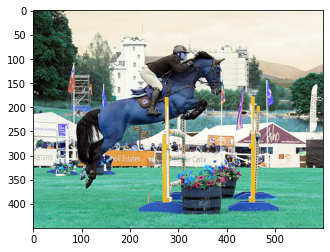

In [21]:
image = cv2.imread('/content/color_image.jpg') #to load an image from the specified file.
print("The type of this input is {}".format(type(image)))
print("Shape: {}".format(image.shape))
plt.imshow(image)

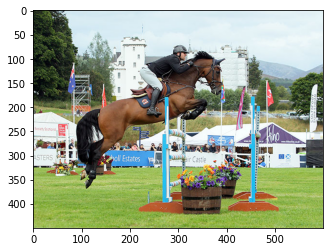

In [22]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)


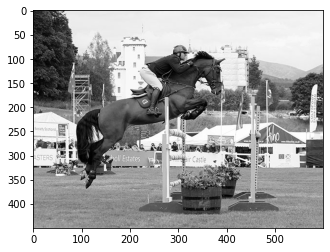

In [23]:
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_image, cmap='gray')


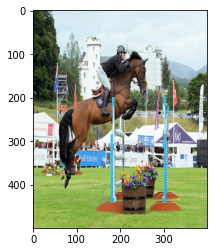

In [24]:
resized_image = cv2.resize(image, (400, 500))
plt.imshow(resized_image)


In [25]:
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))


In [26]:
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image


In [27]:
def get_colors(image, number_of_colors, show_chart):
    
    modified_image = cv2.resize(image, (300, 400), interpolation = cv2.INTER_AREA)
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1],3)
    
    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(modified_image)
    
    counts = Counter(labels)
    counts = dict(sorted(counts.items()))
    #sort to ensure the correct color percentage
    
    center_colors = clf.cluster_centers_
    #we get the ordered colors by iterating through the keys
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]
    if (show_chart):
        plt.figure(figsize = (10, 8))
        plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)
        
        return rgb_colors


[array([141.2224167 , 174.20528849,  73.24804651]),
 array([227.11153434, 239.95886237, 243.095226  ]),
 array([67.54392837, 64.30282197, 47.65448877]),
 array([127.87273022, 132.8002594 , 139.18466278]),
 array([ 64.25492228, 169.8507772 , 227.60379965]),
 array([180.48313792, 190.15278617, 193.06092107]),
 array([165.12318478,  96.62894342,  62.85294609]),
 array([25.9617633 , 27.64523239, 22.97661715]),
 array([95.38650633, 99.23645844, 77.5916782 ]),
 array([167.0517335 , 187.10090747,  99.87628946])]

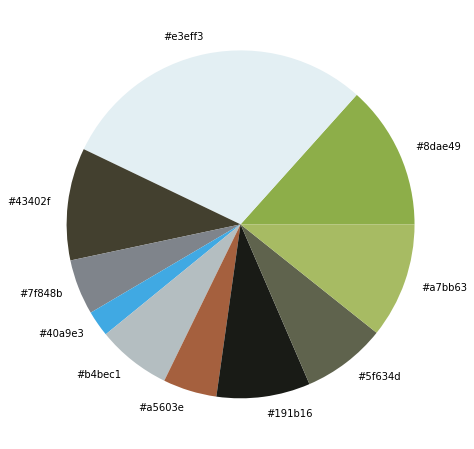

In [28]:
get_colors(get_image('/content/color_image.jpg'), 10, True)